Loading and Preprocessing

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# Loading iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['Species'] = iris.target

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Dropping species column
X = data.drop('Species', axis=1)

X_km = X.copy()

X_km.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Clustering Algorithm Implementation

###A) KMeans Clustering

* Description of KMeans Clustering :
>Kmeans is a centroid-based clustering algorithm. It partitions data into 'K' clusters, where each cluster is represented by its centroid. The algorithm minimizes the variance within clusters, iteratively adjusting centroids until convergence.

* Suitability for the Iris dataset.
> The Iris dataset is suitable for KMeans clustering because it has continuous numeric features and known separable groups (species), making it a good candidate for centroid-based partitioning.

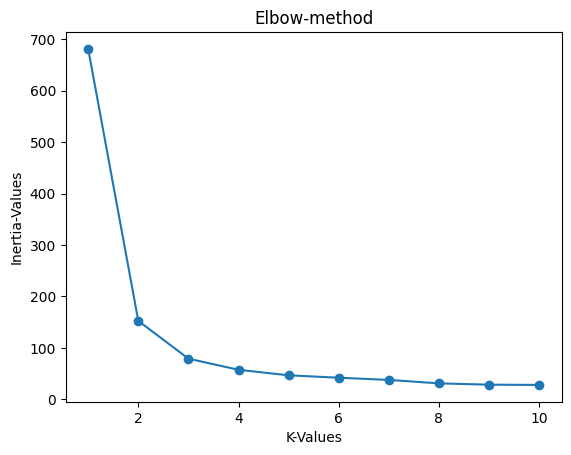

In [ ]:
# KMeans implementation

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Finding optimal k value for implementing KMeans
inertia_values = []
k_range = range(1, 11)

for k in k_range:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X_km)
  inertia_values.append(kmeans.inertia_)


plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow-method')
plt.xlabel('K-Values')
plt.ylabel('Inertia-Values')

plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Range of k values to evaluate
optimal_k_range = range(3, 6)

for k in optimal_k_range:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  cluster_labels = kmeans.fit_predict(X_km)

  print(f'Optimal k values as {k}')
  print('------------------------------')

  # Calculating Silhouette Score
  sil_score = silhouette_score(X_km, cluster_labels)
  print(f'Silhouette Score : {sil_score:.2f}')

  # Calculating Davies-Bouldin Score
  db_score = davies_bouldin_score(X_km, cluster_labels)
  print(f'Davies_Bouldin Score : {db_score:.2f}')
  print('\n')



Optimal k values as 3
------------------------------
Silhouette Score : 0.55
Davies_Bouldin Score : 0.66


Optimal k values as 4
------------------------------
Silhouette Score : 0.50
Davies_Bouldin Score : 0.78


Optimal k values as 5
------------------------------
Silhouette Score : 0.49
Davies_Bouldin Score : 0.82




##Based on the metrics:

###Optimal k = 3

* It has the highest Silhouette Score (0.55)
* It has the lowest Davies-Bouldin Score (0.66)

In [ ]:
# Choosing optimal number of clusters as 3 from elbow plot and metrics

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
X_km['KMeans_Cluster'] = kmeans.fit_predict(X_km)

X_km.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),KMeans_Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
# Evaluate model performance using original features
original_features_km = X_km.drop('KMeans_Cluster', axis=1)

# Silhouette score
sil_score = silhouette_score(original_features_km, X_km['KMeans_Cluster'])
print(f'Silhouette Score: {sil_score:.2f}')

# Davies-Bouldin score
db_score = davies_bouldin_score(original_features_km, X_km['KMeans_Cluster'])
print(f'Davies-Bouldin Score: {db_score:.2f}')

Silhouette Score: 0.55
Davies-Bouldin Score: 0.66


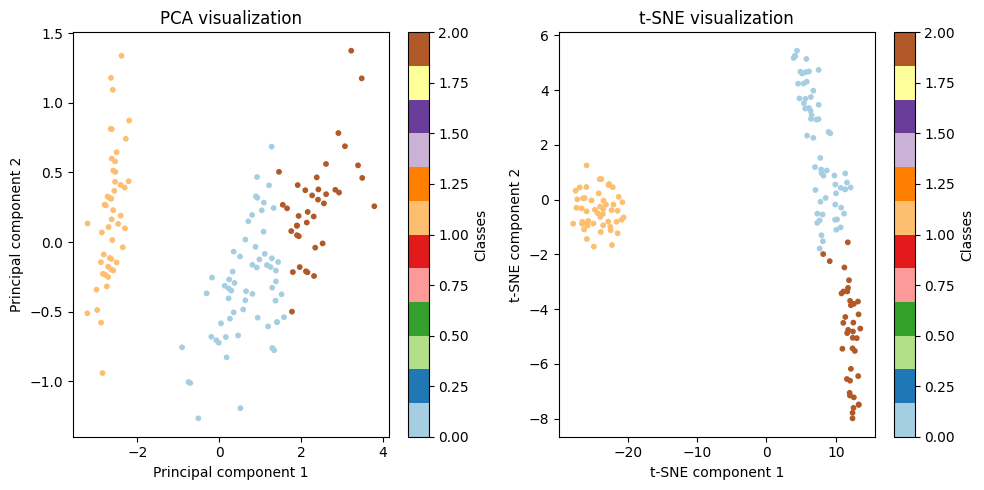

In [ ]:
# Visualisation of Clusters using PCA and t-SNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Dimensionality reduction with PCA
pca = PCA(0.95)
X_km_pca = pca.fit_transform(original_features_km)

# Visualizing PCA results
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
scatter = plt.scatter(X_km_pca[:, 0], X_km_pca[:, 1], c=X_km['KMeans_Cluster'], cmap='Paired', s=10)
plt.colorbar(scatter, label='Classes')
plt.title("PCA visualization")
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

# Dimensionality reduction with t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_km_tsne = tsne.fit_transform(original_features_km)

# Visualizing t-SNE results
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_km_tsne[:, 0], X_km_tsne[:, 1], c=X_km['KMeans_Cluster'], cmap='Paired', s=10)
plt.colorbar(scatter, label='Classes')
plt.title('t-SNE visualization')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')

plt.tight_layout()
plt.show()

###B) Hierarchical Clustering

* Description of Hierarchical Clustering:
> Hierarchical clustering buiulds a tree (dendrogram) representing nested clusters. The algorithm can be divisive (top-down) or agglomerative (bottom-up). The clusters are formed by grouping data points based on their similarity.

* Suitability for the Iris dataset:
> Hierarchical clustering is suitable for the Iris dataset because it provides a detailed view of how data points cluster at different levels, which can reveal relationships between clusters.

In [ ]:
# Implementation of Hierarchical Clustering

import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

X_hc = X.copy()

X_hc.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


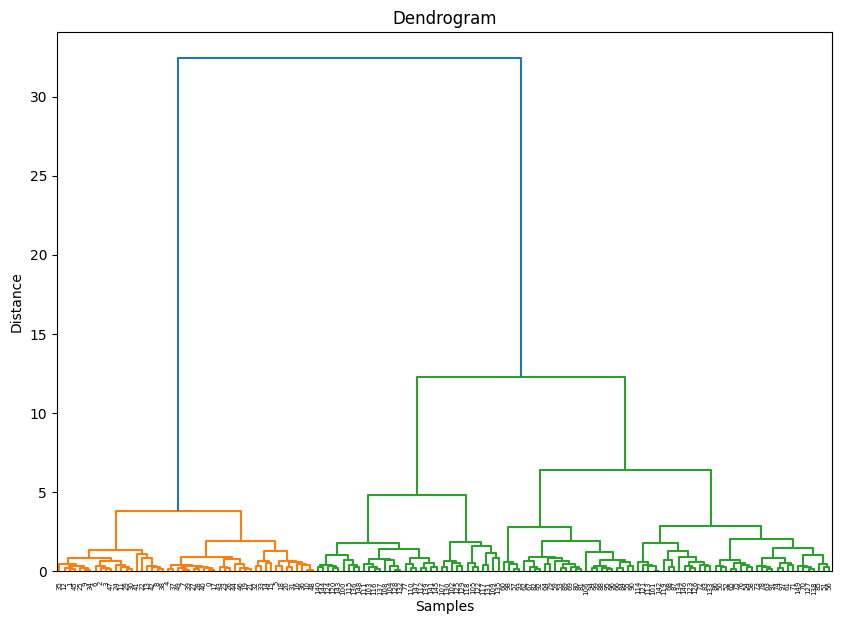

In [ ]:
# Dendrogram
plt.figure(figsize=(10, 7))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(X_hc, method='ward'))
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Unique colors for optimal number of clusters
unique_colors = set(dend['color_list'])

unique_colors

{'C0', 'C1', 'C2'}

In [ ]:
# Optimal number of clusters
optimal_number_of_clusters = len(unique_colors) - 1

In [ ]:
# Implementing Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=optimal_number_of_clusters, metric='euclidean', linkage='ward')
X_hc['HC_Cluster'] = hc.fit_predict(X_hc)

In [ ]:
X_hc.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),HC_Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
# Evaluate model performance using original features
original_features_hc = X_hc.drop('HC_Cluster', axis=1)

# Silhouette score
sil_score = silhouette_score(original_features_hc, X_hc['HC_Cluster'])
print(f'Silhouette Score: {sil_score:.2f}')

# Davies-Bouldin score
db_score = davies_bouldin_score(original_features_hc, X_hc['HC_Cluster'])
print(f'Davies-Bouldin Score: {db_score:.2f}')

Silhouette Score: 0.69
Davies-Bouldin Score: 0.38


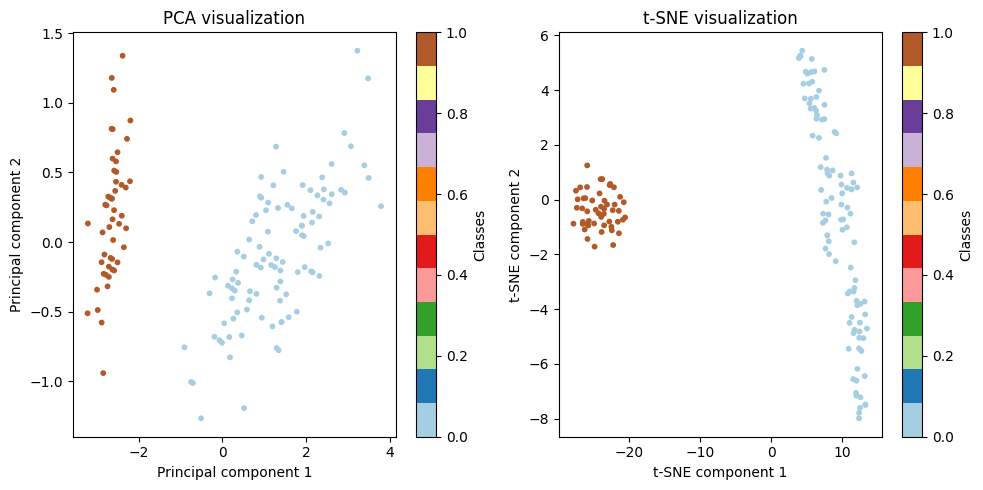

In [ ]:
# Dimensionality reduction with PCA
pca = PCA(0.95)
X_hc_pca = pca.fit_transform(original_features_hc)

# Visualizing PCA results
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
scatter = plt.scatter(X_hc_pca[:, 0], X_hc_pca[:, 1], c=X_hc['HC_Cluster'], cmap='Paired', s=10)
plt.colorbar(scatter, label='Classes')
plt.title("PCA visualization")
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

# Dimensionality reduction with t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_hc_tsne = tsne.fit_transform(original_features_hc)

# Visualizing t-SNE results
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_hc_tsne[:, 0], X_hc_tsne[:, 1], c=X_hc['HC_Cluster'], cmap='Paired', s=10)
plt.colorbar(scatter, label='Classes')
plt.title('t-SNE visualization')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')

plt.tight_layout()
plt.show()